In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
#fun = lambda x: 2*x**2 + 16/x; a0 = 0.5; b0 = 3
#fun = lambda x: x**2 + 54/x; a0 = 0.2; b0 = 8
fun = lambda x: -np.exp(-x)*np.sin(x); a0 = 0; b0 = 1.5
#fun = lambda x: x**2 + 4*np.cos(x); a0 = 1; b0 = 3

<IPython.core.display.Javascript object>


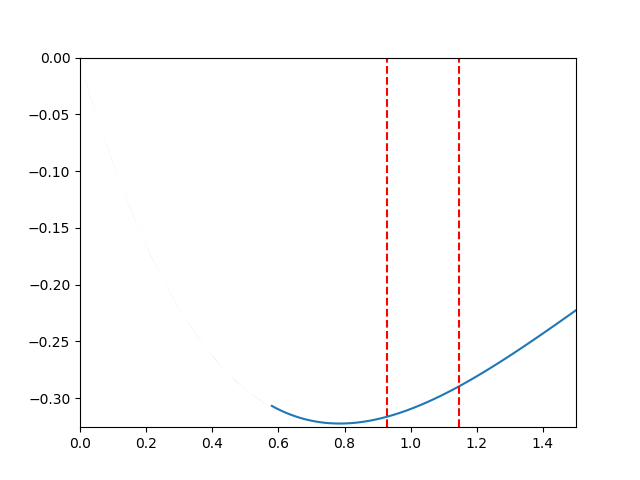

In [11]:
%matplotlib notebook

nclicks = 0
itera = 0
evalu = 0

tol = 0.001;
omega = 0.3819;

# Graficar
t = np.linspace(a0, b0,100)
F = fun(t)

mi = min(F); ma = max(F);
graf = [mi,ma];

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t,F)
ax.set_xlim(a0,b0)
ax.set_ylim(mi-0.01*np.abs(mi),ma+0.01*np.abs(ma))

def onclick(event):
    global itera, evalu
    global a0, b0, omega, tol, fun, line3
    global nclicks
    global fb1, fa1
    global a1, b1, line1, line2
    
    if nclicks == 0:
        r = b0-a0
        a1 = a0 + omega*r
        b1 = b0 - omega*r

        line1 = ax.axvline(a1,color='r',linestyle='--')
        line2 = ax.axvline(b1,color='r',linestyle='--')
        try:
            line3.remove()
        except:
            pass
        fb1 = fun(b1);
        fa1 = fun(a1);
        fig.canvas.draw()  
        nclicks += 1
    else:
        if fb1 < fa1:
            L = np.linspace(a0,a1,10);
            ax.plot(L,fun(L),color='w',linewidth=2.5)
            line3 = ax.axvline(a1,color='k',linestyle='-')
            a0 = a1
        else:
            L = np.linspace(b0,b1,10);
            ax.plot(L,fun(L),color='w',linewidth=2.5)
            b0 = b1
            line3 = ax.axvline(b1,color='k',linestyle='-')
        #fig.canvas.draw()
        #input('\b')
        #plt.pause(1)
        itera = itera + 1
        evalu = evalu + 2
        line1.remove()
        line2.remove()
        nclicks = 0

    #plt.draw()  # only necessary with some backends
        
cid = fig.canvas.mpl_connect('button_press_event', onclick)